In [89]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [50]:
data_path = 'Music/smoking.csv'
df = pd.read_csv(data_path)

In [51]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [52]:
labelencoder = LabelEncoder()
column_drop = ['region', 'amt_weekends', 'amt_weekdays', 'type', 'Unnamed: 0', 'nationality']
df = df.drop(columns=column_drop)
categorical_columns = ['gender', 'marital_status', 'highest_qualification', 'ethnicity', 'smoke']
mask = df['gross_income'].str.contains('Above|Under')
df = df[~mask]
for column in categorical_columns:
     df[column] = labelencoder.fit_transform(df[column])
     original_labels = list(labelencoder.classes_)
     mapping = dict(zip(original_labels, range(len(original_labels))))
     print(mapping)
 


{'Female': 0, 'Male': 1}
{'Divorced': 0, 'Married': 1, 'Separated': 2, 'Single': 3, 'Widowed': 4}
{'A Levels': 0, 'Degree': 1, 'GCSE/CSE': 2, 'GCSE/O Level': 3, 'Higher/Sub Degree': 4, 'No Qualification': 5, 'ONC/BTEC': 6, 'Other/Sub Degree': 7}
{'Asian': 0, 'Black': 1, 'Chinese': 2, 'Mixed': 3, 'Refused': 4, 'Unknown': 5, 'White': 6}
{'No': 0, 'Yes': 1}


In [53]:
df.head()

,gender,age,marital_status,highest_qualification,ethnicity,gross_income,smoke
0,1,38,0,5,6,"2,600 to 5,200",0
2,1,40,1,1,6,"28,600 to 36,400",0
3,0,40,1,1,6,"10,400 to 15,600",0
4,0,39,1,3,6,"2,600 to 5,200",0
5,0,37,1,3,6,"15,600 to 20,800",0


In [54]:
def convert_income_string(s):
    s = s.replace(',', '')  # Remove commas
    if 'Under' in s:
        return int(s.split(' ')[1])
    elif 'to' in s:
        low, high = map(int, s.split(' to '))
        return (low + high) // 2
    elif 'Above' in s:
        return int(s.split(' ')[1])
    else:
        return None  # Handle any unexpected format

# Apply the function to the 'gross_salary' column
df['gross_income_int'] = df['gross_income'].apply(convert_income_string)
df = df.drop(columns=['gross_income'])
df.dropna(inplace=True)

In [55]:
df.head()

,gender,age,marital_status,highest_qualification,ethnicity,smoke,gross_income_int
0,1,38,0,5,6,0,3900.0
2,1,40,1,1,6,0,32500.0
3,0,40,1,1,6,0,13000.0
4,0,39,1,3,6,0,3900.0
5,0,37,1,3,6,0,18200.0


In [56]:
X = df.drop(columns=['gross_income_int'])
y = df['gross_income_int']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10, min_samples_split=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [59]:
y_pred = model.predict(X_test)

# Performance evaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 5735.49


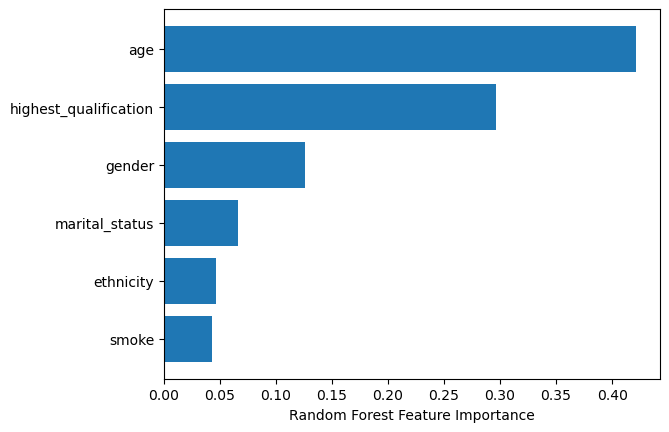

In [60]:
features = ['gender', 'age', 'marital_status', 'highest_qualification', 'ethnicity', 'smoke']
importances = model.feature_importances_
sorted_idx = importances.argsort()

# Plotting
plt.barh([features[i] for i in sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.show()

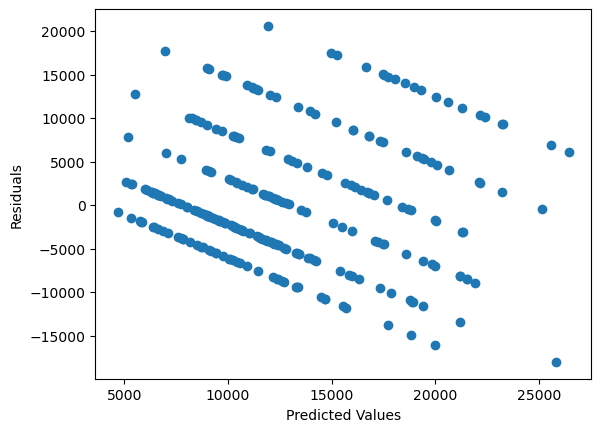

In [45]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [40]:
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, parameters, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_


In [16]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [61]:
best_rf.fit(X, y)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200)

In [48]:
import joblib
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')

['optimized_random_forest_model.pkl']

In [71]:
# Assuming df is your dataframe
X = df[['age']].values
y = df['gross_income_int'].values

In [85]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

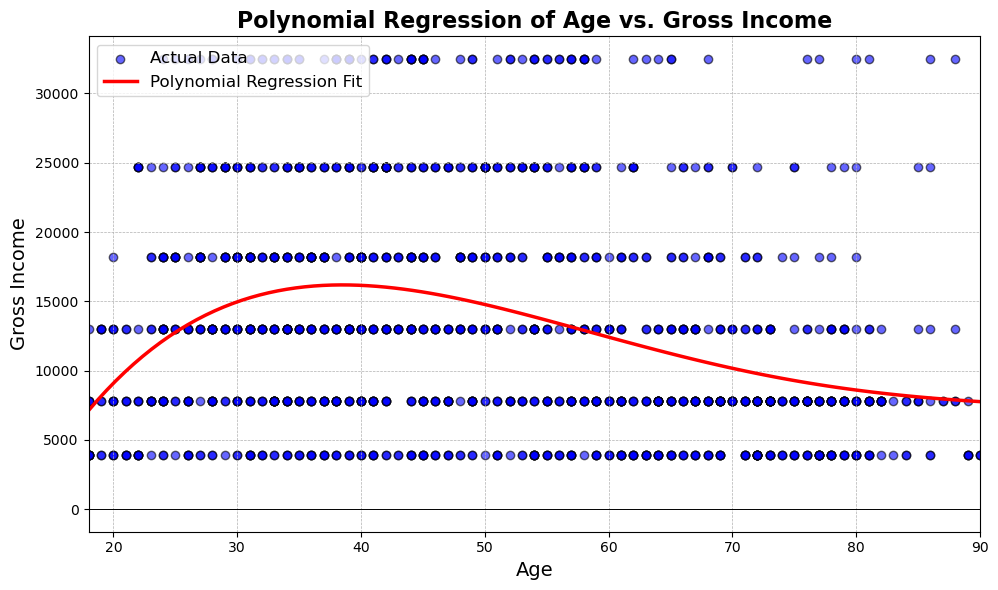

In [92]:
# First, split into train and temporary sets (80% train, 20% temp)
X_temp, X_test, y_temp, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Then, split the temporary set into validation and test sets (50% validation, 50% test from the temp set)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions for plotting
x_space = np.linspace(18, 90, 100).reshape(-1, 1)  # Generating points for a smooth curve within the range 18-90
x_space_poly = poly.transform(x_space)
y_space_pred = model.predict(x_space_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6, edgecolor='black')
plt.plot(x_space, y_space_pred, color='red', label='Polynomial Regression Fit', linewidth=2.5)

# Annotations and style
plt.title('Polynomial Regression of Age vs. Gross Income', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Gross Income', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.xlim(18, 90)  # Restrict x-axis to show ages between 18 and 90

# Show plot
plt.show()



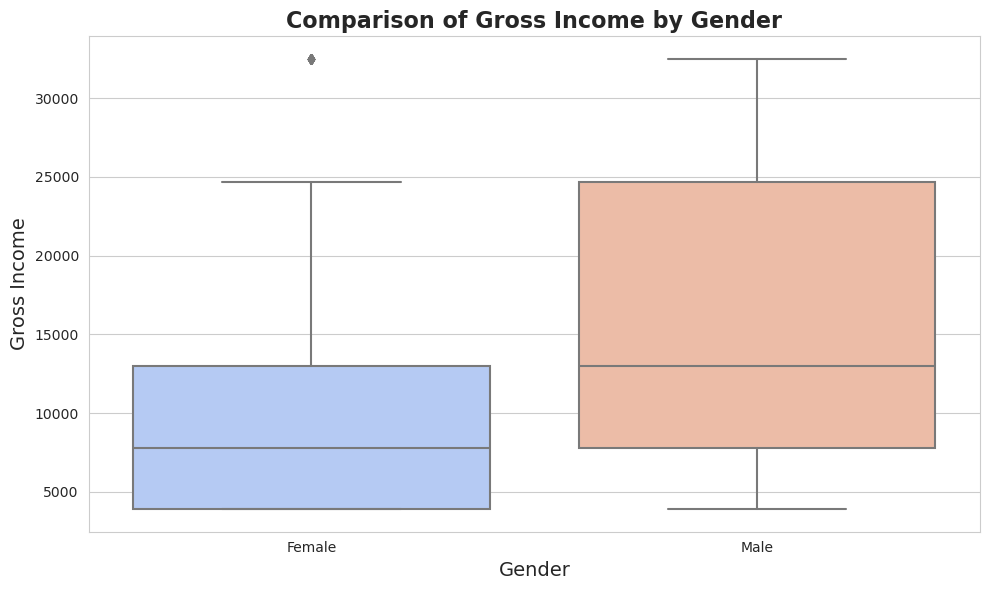

In [93]:

# Setting seaborn style
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['gender'], y=df['gross_income_int'], palette="coolwarm")

# Annotations and style
plt.title('Comparison of Gross Income by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Gross Income', fontsize=14)
plt.xticks([0, 1], ['Female', 'Male'])  # Set x-tick labels

# Show plot
plt.tight_layout()
plt.show()